In [ ]:
import tensorflow as tf 
import cv2 
import os
import matplotlib.pyplot as plt 
import numpy as np
import random

In [ ]:
Classes = ["0", "1", "2", "3","4", "5", "6"]

In [ ]:
Datadirectory = "train/"
for category in Classes:
    path = os.path.join(Datadirectory, category) ## //
    for img in os.listdir(path):
        img_array = cv2.imread (os.path.join(path, img))
        #backtorgb = cv2. cvtColor(img_array, cv2.COLOR_GRAY2RGB)
        plt.imshow(cv2.cvtColor (img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

In [ ]:
training_Data = [] 
def create_training_Data(Classes):
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num= Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array= cv2.imread (os.path.join(path, img))
                
                training_Data.append([img_array,class_num])
            except Exception as e:
                pass

In [ ]:
create_training_Data(Classes)

In [ ]:
len(training_Data)

In [ ]:
random.shuffle(training_Data)

In [ ]:
X = [] 
y = [] 
for features, label in training_Data:
    X.append(features)
    y.append(label)
    #X = np.array(X).reshape(-1, 48, 48, 3)

In [ ]:
X = np.array(X).reshape(-1, 48, 48, 3)

In [ ]:
X[0].shape

In [ ]:
X = X/255.0

In [ ]:
Y = np.array(y)

In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models

In [ ]:
model = models.Sequential()

In [ ]:
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation = 'softmax'))

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()
earlystopping = tf.keras.callbacks.EarlyStopping(
                    monitor="val_loss",
                    min_delta=0.0001,
                    patience=20,
                    verbose=1,
                    mode="auto",
                    baseline=None,
                    restore_best_weights=False,
)

In [ ]:
history = model.fit(X, Y, epochs = 25, callbacks = earlystopping)

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')


In [ ]:
model.save('./app_cv/emotion_detector.h5')


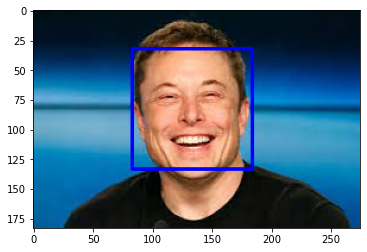

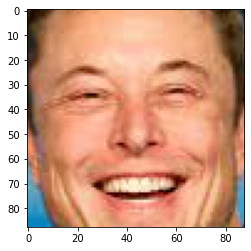

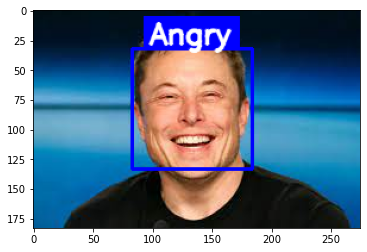